In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 카테고리 컬런 인코딩

켤측치 처리

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.distributor =df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

In [ ]:
df.genre =df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

In [ ]:
df.screening_rat =df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [ ]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,80,10,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,21,2,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,21,10,1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,6,11,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,96,11,1


컬럼 삭제

In [ ]:
df.drop(columns=['title','time','release_time','director'],inplace=True)

값이 0인 컬럼은 log변환할때 에러 발생

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 49.2 KB


# 표준화

In [ ]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean()) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean()) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean()) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean()) / df.num_staff_log.std()
#df['box_off_num_log'] = (df.box_off_num_log - df.box_off_num_log.mean()) / df.box_off_num_log.std()

# 데이터 분포

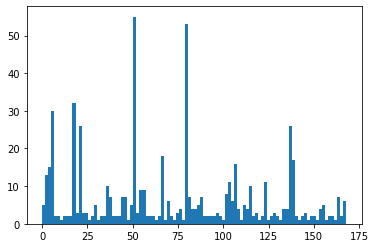

In [ ]:
plt.hist(df.distributor_code.to_numpy(), bins=100)
plt.show()

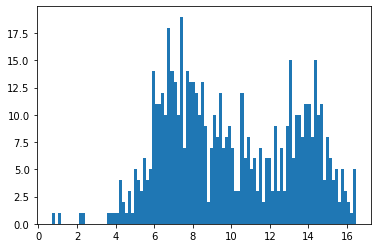

In [ ]:
plt.hist(df.box_off_num_log.to_numpy(), bins=100)
plt.show()

# one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 196 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(185)
memory usage: 155.3 KB


## 불필요 column 삭제

In [ ]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

In [ ]:
# y = df.box_off_num.to_numpy()
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)
x = df.to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


In [ ]:
split_index = int(len(x)* 0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1900      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


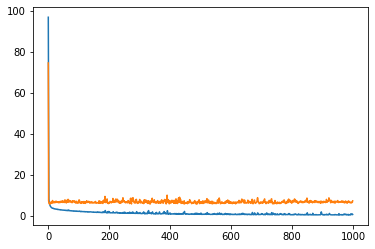

4/4 [==============================] - 0s 4ms/step - loss: 4.2224 - mape: 18.3165 - root_mean_squared_error: 2.0548
loss= 4.222384929656982
mape= 18.316539764404297
rmse= 2.0548441410064697


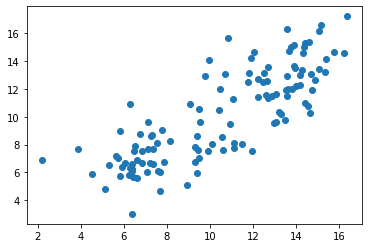

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(189,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)
d
plt.scatter(test_y, y_)
plt.show()

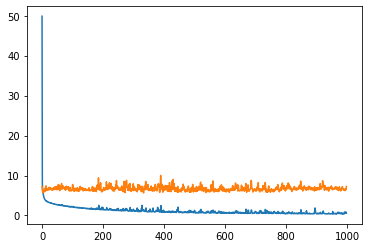

In [ ]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.show()

In [ ]:
pre = np.exp(y_)
org_test_y = np.exp(test_y)
rmse = RootMeanSquaredError()
r= rmse(pre, org_test_y)
print(r)

tf.Tensor(2699610.2, shape=(), dtype=float32)


# -----------------------------------------------------------------

# train, test 데이터 불러오기

In [ ]:
df_train=pd.read_csv("movies_train.csv")
df_test=pd.read_csv("movies_test.csv")
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
df_test['box_off_num'] = df_test.dir_prev_num

In [ ]:
df = pd.concat([df_train , df_test])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     843 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 85.6+ KB


# 카테고리 컬럼 인코딩

켤측치 처리

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.distributor =df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

In [ ]:
df.genre =df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

In [ ]:
df.screening_rat =df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [ ]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,97,10,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,27,2,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,27,10,1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7,11,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,122,11,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   title               843 non-null    object  
 1   distributor         843 non-null    category
 2   genre               843 non-null    category
 3   release_time        843 non-null    object  
 4   time                843 non-null    int64   
 5   screening_rat       843 non-null    category
 6   director            843 non-null    object  
 7   dir_prev_bfnum      843 non-null    float64 
 8   dir_prev_num        843 non-null    int64   
 9   num_staff           843 non-null    int64   
 10  num_actor           843 non-null    int64   
 11  box_off_num         843 non-null    int64   
 12  distributor_code    843 non-null    int16   
 13  genre_code          843 non-null    int8    
 14  screening_rat_code  843 non-null    int8    
dtypes: category(3), float64(1), int16(1), in

컬럼 삭제

In [ ]:
df.drop(columns=['title','time','release_time','director'],inplace=True)

값이 0인 컬럼은 log변환할때 에러 발생

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         843 non-null    category
 1   genre               843 non-null    category
 2   screening_rat       843 non-null    category
 3   dir_prev_bfnum      843 non-null    float64 
 4   dir_prev_num        843 non-null    int64   
 5   num_staff           843 non-null    int64   
 6   num_actor           843 non-null    int64   
 7   box_off_num         843 non-null    int64   
 8   distributor_code    843 non-null    int16   
 9   genre_code          843 non-null    int8    
 10  screening_rat_code  843 non-null    int8    
 11  dir_prev_bfnum_log  843 non-null    float64 
 12  num_staff_log       843 non-null    float64 
 13  box_off_num_log     843 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 71.6 KB


# 표준화

In [ ]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean()) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean()) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean()) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean()) / df.num_staff_log.std()
#df['box_off_num_log'] = (df.box_off_num_log - df.box_off_num_log.mean()) / df.box_off_num_log.std()

# 데이터 분포

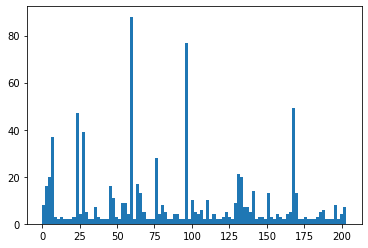

In [ ]:
plt.hist(df.distributor_code.to_numpy(), bins=100)
plt.show()

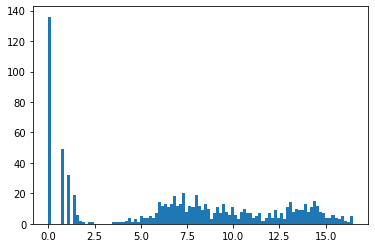

In [ ]:
plt.hist(df.box_off_num_log.to_numpy(), bins=100)
plt.show()

# one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Columns: 231 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(220)
memory usage: 249.4 KB


## 불필요 column 삭제

In [ ]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

In [ ]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)
x = df.to_numpy()

In [ ]:
split_index = 600

train_x, submission_x = x[:split_index], x[split_index:]
train_y, submission_y = y[:split_index], y[split_index:]
train_x, test_x = train_x[:400], train_x[400:]
train_y, test_y = train_y[:400], train_y[400:]

In [ ]:
print(x.shape)
print(y.shape)

(843, 224)
(843,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Columns: 224 entries, dir_prev_num to screening_rat_code_3
dtypes: float64(4), uint8(220)
memory usage: 207.6 KB


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                2250      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


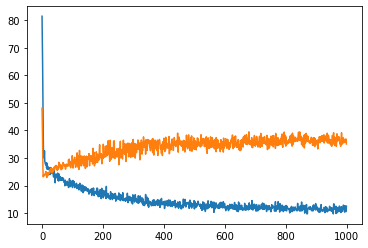

7/7 [==============================] - 0s 2ms/step - loss: 35.0414 - mape: 1554936192.0000 - root_mean_squared_error: 5.9196
loss= 35.041378021240234
mape= 1554936192.0
rmse= 5.9195756912231445


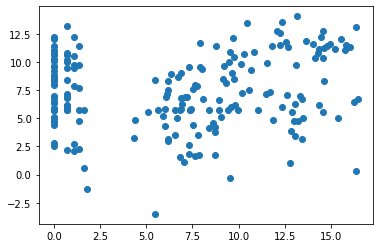

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(224,)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

In [ ]:
pre = np.exp(y_)
org_test_y = np.exp(test_y)
rmse = RootMeanSquaredError()
r= rmse(pre, org_test_y)
print(r)

tf.Tensor(20715868000.0, shape=(), dtype=float32)
